In [1]:
import pandas as pd
import numpy as np
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('abandono.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Busqueda de Valores Nulos

In [4]:
null_sumary = pd.DataFrame()

In [5]:
for c_ in df.columns:
    r_ = pd.DataFrame({
        "Columna":[c_],
        "CantidadNulls": [np.sum(pd.isnull(df[c_]))],
        "Porcentaje": [np.sum(pd.isnull(df[c_])) / df[c_].shape[0]]
    })
    null_sumary = pd.concat([null_sumary, r_])

In [6]:
null_sumary

,Columna,CantidadNulls,Porcentaje
0,RowNumber,0,0.0
0,CustomerId,0,0.0
0,Surname,0,0.0
0,CreditScore,0,0.0
0,Geography,0,0.0
0,Gender,0,0.0
0,Age,0,0.0
0,Tenure,0,0.0
0,Balance,0,0.0
0,NumOfProducts,0,0.0


In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

## EDA

#### Porcentaje de Abandono

In [8]:
(df.loc[ : , ["Exited"] ].value_counts() / df.shape[0])

Exited
0         0.7963
1         0.2037
dtype: float64

#### Porcentaje Clientes por Region

In [9]:
(df.loc[ : , ["Geography"] ].value_counts() / df.shape[0])

Geography
France       0.5014
Germany      0.2509
Spain        0.2477
dtype: float64

#### Porcentaje si es Miembro del banco Activo

In [10]:
(df.loc[ : , ["IsActiveMember"] ].value_counts() / df.shape[0])

IsActiveMember
1                 0.5151
0                 0.4849
dtype: float64

In [11]:
df.loc[ : , ["IsActiveMember"] ].value_counts()

IsActiveMember
1                 5151
0                 4849
dtype: int64

#### ¿Cuantos abandonaron por region?

In [12]:
france = df.loc[ (df['Geography'] == "France")].copy()
france.loc[ : , ["Exited"] ].value_counts()

Exited
0         4204
1          810
dtype: int64

In [13]:
france = df.loc[ (df['Geography'] == "Germany")].copy()
france.loc[ : , ["Exited"] ].value_counts()

Exited
0         1695
1          814
dtype: int64

In [14]:
france = df.loc[ (df['Geography'] == "Spain")].copy()
france.loc[ : , ["Exited"] ].value_counts()

Exited
0         2064
1          413
dtype: int64

## Valores Atipicos

<AxesSubplot:xlabel='Exited', ylabel='Balance'>

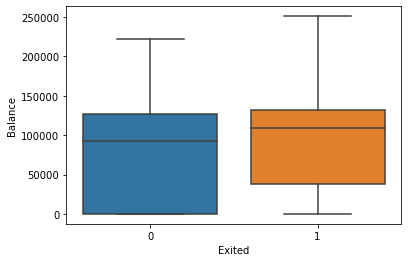

In [15]:
sns.boxplot( data=df  , x="Exited" , y="Balance" )

<AxesSubplot:xlabel='Exited', ylabel='NumOfProducts'>

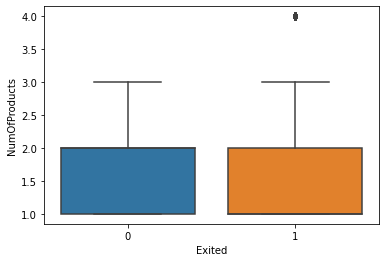

In [16]:
sns.boxplot( data=df  , x="Exited" , y="NumOfProducts" )

<AxesSubplot:xlabel='Exited', ylabel='Tenure'>

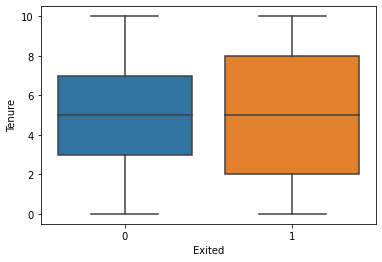

In [17]:
sns.boxplot( data=df  , x="Exited" , y="Tenure" )

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

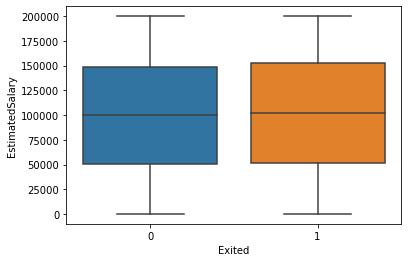

In [18]:
sns.boxplot( data=df  , x="Exited" , y="EstimatedSalary" )

## Transformaciones de Columnas

#### Historial Crediticio por año

In [19]:
df["CreditScore_Age"] = df["CreditScore"]/df["Age"]

In [20]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_Age
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,14.738095
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,14.829268
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,11.952381
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,17.923077
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,19.767442


#### Tenencia por año

In [21]:
df["Tenure_Age"] = df["Tenure"]/df["Age"]

In [22]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_Age,Tenure_Age
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,14.738095,0.047619
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,14.829268,0.024390
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,11.952381,0.190476
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,17.923077,0.025641
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,19.767442,0.046512


#### Balance por año

In [23]:
df["Balance_Age"] = df["Balance"]/df["Age"]

In [24]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_Age,Tenure_Age,Balance_Age
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,14.738095,0.047619,0.000000
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,14.829268,0.024390,2044.094146
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,11.952381,0.190476,3801.447619
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,17.923077,0.025641,0.000000
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,19.767442,0.046512,2918.856279


#### Transformar la region y genero en un valor numerico

In [25]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
CreditScore_Age    float64
Tenure_Age         float64
Balance_Age        float64
dtype: object

In [26]:
lst = ['Geography', 'Gender']
remove = list()

for i in lst:
    if (df[i].dtype == object):
        for j in df[i].unique():
            df[i+'_'+j] = np.where(df[i] == j,1,0)
        remove.append(i)
df = df.drop(remove, axis=1)

In [27]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditScore_Age,Tenure_Age,Balance_Age,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,14.738095,0.047619,0.000000,1,0,0,1,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,14.829268,0.024390,2044.094146,0,1,0,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,11.952381,0.190476,3801.447619,1,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,17.923077,0.025641,0.000000,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,19.767442,0.046512,2918.856279,0,1,0,1,0


In [28]:
df.dtypes

RowNumber              int64
CustomerId             int64
Surname               object
CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
CreditScore_Age      float64
Tenure_Age           float64
Balance_Age          float64
Geography_France       int64
Geography_Spain        int64
Geography_Germany      int64
Gender_Female          int64
Gender_Male            int64
dtype: object

## Entrenamiento ML Supervisado

In [29]:
df_train = df.loc[:,["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary", "CreditScore_Age", 
                      "Tenure_Age", "Balance_Age", "Geography_France", "Geography_Spain", "Geography_Germany",
                      "Gender_Female", "Gender_Male", "Exited"]].copy()

In [30]:
df_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,CreditScore_Age,Tenure_Age,Balance_Age,Geography_France,Geography_Spain,Geography_Germany,Gender_Female,Gender_Male,Exited
0,619,42,2,0.00,1,101348.88,14.738095,0.047619,0.000000,1,0,0,1,0,1
1,608,41,1,83807.86,1,112542.58,14.829268,0.024390,2044.094146,0,1,0,1,0,0
2,502,42,8,159660.80,3,113931.57,11.952381,0.190476,3801.447619,1,0,0,1,0,1
3,699,39,1,0.00,2,93826.63,17.923077,0.025641,0.000000,1,0,0,1,0,0
4,850,43,2,125510.82,1,79084.10,19.767442,0.046512,2918.856279,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,96270.64,19.769231,0.128205,0.000000,1,0,0,0,1,0
9996,516,35,10,57369.61,1,101699.77,14.742857,0.285714,1639.131714,1,0,0,0,1,0
9997,709,36,7,0.00,1,42085.58,19.694444,0.194444,0.000000,1,0,0,1,0,1
9998,772,42,3,75075.31,2,92888.52,18.380952,0.071429,1787.507381,0,0,1,0,1,1


## Test Regresion Lineal

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve

In [32]:
features_col = df_train.columns.values[0:14]

In [33]:
features_col

array(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'EstimatedSalary', 'CreditScore_Age', 'Tenure_Age', 'Balance_Age',
       'Geography_France', 'Geography_Spain', 'Geography_Germany',
       'Gender_Female', 'Gender_Male'], dtype=object)

In [34]:
X = df_train[features_col].values
y = df_train["Exited"].values

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size = 0.25, random_state=0)

In [36]:
log_model = LogisticRegression(solver='lbfgs', max_iter=1000)
log_model.fit(X_train,Y_train)

LogisticRegression(max_iter=1000)

In [37]:
y_pred  = log_model.predict(X_test)

In [38]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
Y_test

array([0, 1, 0, ..., 0, 0, 0])

In [40]:
log_model.predict_proba(X_test)[:,1]

array([0.2103905 , 0.30281845, 0.22487969, ..., 0.14773246, 0.21025905,
       0.10917568])

In [41]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)

Text(0.5, 257.44, 'Etiqueta de prediccion')

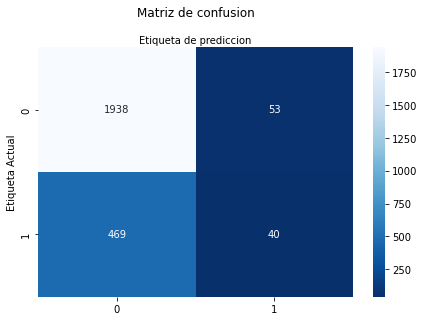

In [42]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap="Blues_r", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriz de confusion", y=1.1)
plt.ylabel("Etiqueta Actual")
plt.xlabel("Etiqueta de prediccion")

In [43]:
print(metrics.accuracy_score(Y_test,y_pred))
print(precision_score(Y_test, y_pred))
print(recall_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))

0.7912
0.43010752688172044
0.07858546168958742
0.13289036544850497


## Test Arbol de Desiciones

In [44]:
from sklearn import tree 

In [45]:
tree_one = tree.DecisionTreeClassifier(random_state=1)

In [46]:
tree_one = tree_one.fit( X_train , Y_train )

In [47]:
tree_one.tree_.max_depth

26

In [48]:
y_pred = tree_one.predict(X_test)

In [49]:
print(metrics.accuracy_score(Y_test,y_pred))
print(precision_score(Y_test, y_pred))
print(recall_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))

0.7864
0.47654784240150094
0.49901768172888017
0.48752399232245686


## Test Random Forest

In [50]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(X_train , Y_train);

In [51]:
y_pred = rf.predict(X_test) >= 0.5

In [55]:
y_pred

array([False, False, False, ..., False, False, False])

In [57]:
Y_test

array([0, 1, 0, ..., 0, 0, 0])

In [52]:
cnf_matrix = metrics.confusion_matrix(Y_test, y_pred)

Text(0.5, 257.44, 'Etiqueta de prediccion')

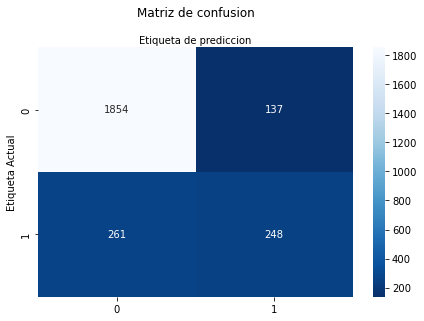

In [53]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap="Blues_r", fmt="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Matriz de confusion", y=1.1)
plt.ylabel("Etiqueta Actual")
plt.xlabel("Etiqueta de prediccion")

In [54]:
print(metrics.accuracy_score(Y_test,y_pred))
print(precision_score(Y_test, y_pred))
print(recall_score(Y_test, y_pred))
print(f1_score(Y_test, y_pred))

0.8408
0.6441558441558441
0.48722986247544203
0.5548098434004474
